# CNN

In [1]:
# University of Notre Dame
# Multi Layer Perceptron (MLP) for "Vulnerability Prediction From Source Code Using Machine Learning"
# _________________________________________________________________________
# Pedro Alarcon, April 2022

In [4]:
import pandas as pd 
import numpy as np
import argparse
import math
import string
from collections.abc import Iterable
from collections import Counter
import pandas as pd 

from sklearn.preprocessing import LabelEncoder,  OneHotEncoder
import argparse
from sklearn.metrics import accuracy_score

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import classification_report
import os
from sklearn.model_selection import train_test_split
print(os.getcwd())

/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Impact of Depth Analysis

In [6]:
#folder_path = '/scratch365/palarcon/Vulnerability Project/CNN/train/'

folder_path = '/content/drive/MyDrive/Vulnerability Prediction/Processed Datasets/'

def load_data(path, column, rdm_state):
    dataframe = pd.read_csv(path)
    
    y = dataframe[column].astype(int) # numberize the labels i.e., tranforms True = 1, False = 0
    print("Label Distribution: ")
    print(y.value_counts())

    y = y.values 
    
    X = dataframe.iloc[:, 7:]
    num_features = len(X.columns) 
    X = X.values

    X = np.reshape(X, (len(X), num_features, 1)) 


    print("Dataset: ")
    print(f"\nShape of features: {X.shape} (# samples, # features, channel) of type {type(X)}" )
    print(f"Shape of labels: {y.shape} (# samples, ) of type {type(X)}" )
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=rdm_state)

    return X_train, X_test, y_train, y_test




X_cwe_119_train, X_cwe_119_test, y_cwe_119_train, y_cwe_119_test = load_data(folder_path + 'cwe_119_train.csv', 'CWE-119', 42)


Label Distribution: 
1    2710
0    2710
Name: CWE-119, dtype: int64
Dataset: 

Shape of features: (5420, 1533, 1) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (5420,) (# samples, ) of type <class 'numpy.ndarray'>


In [12]:
def cnn_model(num_features):
  model = Sequential()
  #add layers
  model.add(Conv1D( input_shape = (num_features, 1), filters=32, kernel_size=9, activation='relu'))
  model.add(Flatten())
  model.add(Dense(200, activation = 'relu'))
  model.add((Dense(1, activation='sigmoid')))
  model.summary()
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

cwe_119_model = cnn_model(1533)
#load trained model
cwe_119_model = keras.models.load_model('/content/drive/MyDrive/Vulnerability Prediction/CNN/cwe_119_model.ph')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1525, 32)          320       
                                                                 
 flatten (Flatten)           (None, 48800)             0         
                                                                 
 dense (Dense)               (None, 200)               9760200   
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 9,760,721
Trainable params: 9,760,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit network
#uncomment the below statement to train new model 
#history = cwe_119_model.fit(X_cwe_119_train, y_cwe_119_train, epochs=10, verbose=2)

Epoch 1/10
153/153 - 1s - loss: 0.2846 - accuracy: 0.9026 - 652ms/epoch - 4ms/step
Epoch 2/10
153/153 - 1s - loss: 0.2657 - accuracy: 0.9116 - 694ms/epoch - 5ms/step
Epoch 3/10
153/153 - 1s - loss: 0.2452 - accuracy: 0.9170 - 663ms/epoch - 4ms/step
Epoch 4/10
153/153 - 1s - loss: 0.1978 - accuracy: 0.9307 - 659ms/epoch - 4ms/step
Epoch 5/10
153/153 - 1s - loss: 0.2251 - accuracy: 0.9196 - 654ms/epoch - 4ms/step
Epoch 6/10
153/153 - 1s - loss: 0.2132 - accuracy: 0.9278 - 656ms/epoch - 4ms/step
Epoch 7/10
153/153 - 1s - loss: 0.1913 - accuracy: 0.9317 - 666ms/epoch - 4ms/step
Epoch 8/10
153/153 - 1s - loss: 0.1764 - accuracy: 0.9387 - 658ms/epoch - 4ms/step
Epoch 9/10
153/153 - 1s - loss: 0.1627 - accuracy: 0.9434 - 642ms/epoch - 4ms/step
Epoch 10/10
153/153 - 1s - loss: 0.1545 - accuracy: 0.9512 - 670ms/epoch - 4ms/step


In [23]:
def run_acccuracy(model, X, y):
  loss, acc = model.evaluate(X, y, verbose=0)
  print(f'Test Accuracy: {acc*100}')


run_acccuracy(cwe_119_model,X_cwe_119_test, y_cwe_119_test)

Test Accuracy: 91.32841229438782


In [9]:
def generate_roc_plot(model, x_test, y_test):
  # Generate a prediction using model.predict() 
  # and calculate it's shape:
  print("Generate a prediction")
  prediction = model.predict(x_test).ravel()
  print("prediction shape:", prediction.shape)

  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, prediction)
  auc_keras = auc(fpr_keras, tpr_keras)

  #generate plot
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_keras, tpr_keras, label=' (area = {:.3f})'.format(auc_keras))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()

Generate a prediction
prediction shape: (542,)


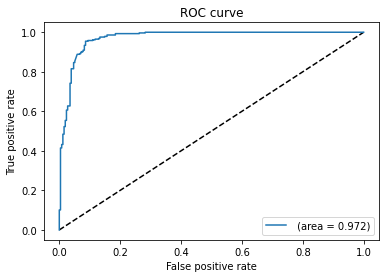

In [10]:
generate_roc_plot(cwe_119_model,X_cwe_119_test, y_cwe_119_test)

In [ ]:
#cwe_119_model.save('/scratch365/palarcon/Vulnerability Project/CNN/cwe_119_model.ph')

2022-04-19 19:41:32.002823: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /scratch365/palarcon/Vulnerability Project/CNN/cwe_119_model.ph/assets


# CWE-120

In [13]:
X_cwe_120_train, X_cwe_120_test, y_cwe_120_train, y_cwe_120_test = load_data(folder_path + 'cwe_120_train.csv', 'CWE-120', 45)
cwe_120_model = cnn_model(1533)
# fit network




Label Distribution: 
1    5159
0    5159
Name: CWE-120, dtype: int64
Dataset: 

Shape of features: (10318, 1533, 1) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (10318,) (# samples, ) of type <class 'numpy.ndarray'>
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1525, 32)          320       
                                                                 
 flatten_1 (Flatten)         (None, 48800)             0         
                                                                 
 dense_2 (Dense)             (None, 200)               9760200   
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 9,760,721
Trainable params: 9,760,721
Non-trainable

In [ ]:
#history = cwe_120_model.fit(X_cwe_120_train, y_cwe_120_train, epochs=20, verbose=2)

Epoch 1/20
291/291 - 2s - loss: 52.0932 - accuracy: 0.6779 - 2s/epoch - 5ms/step
Epoch 2/20
291/291 - 1s - loss: 0.9421 - accuracy: 0.8446 - 1s/epoch - 4ms/step
Epoch 3/20
291/291 - 1s - loss: 0.4001 - accuracy: 0.8986 - 1s/epoch - 4ms/step
Epoch 4/20
291/291 - 1s - loss: 0.2769 - accuracy: 0.9174 - 1s/epoch - 4ms/step
Epoch 5/20
291/291 - 1s - loss: 0.2202 - accuracy: 0.9280 - 1s/epoch - 4ms/step
Epoch 6/20
291/291 - 1s - loss: 0.1943 - accuracy: 0.9323 - 1s/epoch - 4ms/step
Epoch 7/20
291/291 - 1s - loss: 0.1891 - accuracy: 0.9355 - 1s/epoch - 4ms/step
Epoch 8/20
291/291 - 1s - loss: 0.1749 - accuracy: 0.9396 - 1s/epoch - 4ms/step
Epoch 9/20
291/291 - 1s - loss: 0.1699 - accuracy: 0.9379 - 1s/epoch - 4ms/step
Epoch 10/20
291/291 - 1s - loss: 0.1651 - accuracy: 0.9432 - 1s/epoch - 4ms/step
Epoch 11/20
291/291 - 1s - loss: 0.1624 - accuracy: 0.9448 - 1s/epoch - 4ms/step
Epoch 12/20
291/291 - 1s - loss: 0.1560 - accuracy: 0.9444 - 1s/epoch - 4ms/step
Epoch 13/20
291/291 - 1s - loss: 0.1

Generate a prediction
prediction shape: (1032,)


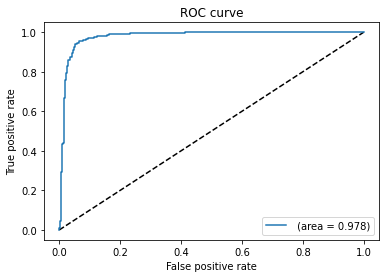

In [14]:
cwe_120_model = keras.models.load_model('/content/drive/MyDrive/Vulnerability Prediction/CNN/cwe_120_model.ph')
generate_roc_plot(cwe_120_model, X_cwe_120_test, y_cwe_120_test)


In [ ]:
cwe_120_model.save('/scratch365/palarcon/Vulnerability Project/CNN/cwe_120_model.ph')

INFO:tensorflow:Assets written to: /scratch365/palarcon/Vulnerability Project/CNN/cwe_120_model.ph/assets


# CSE 469

In [15]:
X_cwe_469_train, X_cwe_469_test, y_cwe_469_train, y_cwe_469_test = load_data(folder_path + 'cwe_469_train.csv', 'CWE-469', 40)
cwe_469_model = cnn_model(1533)
cwe_469_model = keras.models.load_model('/content/drive/MyDrive/Vulnerability Prediction/CNN/cwe_469_model.ph')

Label Distribution: 
1    324
0    324
Name: CWE-469, dtype: int64
Dataset: 

Shape of features: (648, 1533, 1) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (648,) (# samples, ) of type <class 'numpy.ndarray'>
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1525, 32)          320       
                                                                 
 flatten_2 (Flatten)         (None, 48800)             0         
                                                                 
 dense_4 (Dense)             (None, 200)               9760200   
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 9,760,721
Trainable params: 9,760,721
Non-trainable param

In [ ]:
# fit network
#uncomment below to train new model
#history = cwe_469_model.fit(X_cwe_469_train, y_cwe_469_train, epochs=10, verbose=2)

Epoch 1/10
19/19 - 0s - loss: 0.1731 - accuracy: 0.9417 - 82ms/epoch - 4ms/step
Epoch 2/10
19/19 - 0s - loss: 0.4099 - accuracy: 0.9297 - 82ms/epoch - 4ms/step
Epoch 3/10
19/19 - 0s - loss: 0.1319 - accuracy: 0.9451 - 85ms/epoch - 4ms/step
Epoch 4/10
19/19 - 0s - loss: 0.1852 - accuracy: 0.9383 - 87ms/epoch - 5ms/step
Epoch 5/10
19/19 - 0s - loss: 0.1832 - accuracy: 0.9348 - 84ms/epoch - 4ms/step
Epoch 6/10
19/19 - 0s - loss: 0.2447 - accuracy: 0.9194 - 84ms/epoch - 4ms/step
Epoch 7/10
19/19 - 0s - loss: 0.1263 - accuracy: 0.9468 - 87ms/epoch - 5ms/step
Epoch 8/10
19/19 - 0s - loss: 0.1485 - accuracy: 0.9485 - 86ms/epoch - 5ms/step
Epoch 9/10
19/19 - 0s - loss: 0.1584 - accuracy: 0.9571 - 83ms/epoch - 4ms/step
Epoch 10/10
19/19 - 0s - loss: 0.0773 - accuracy: 0.9588 - 85ms/epoch - 4ms/step


Generate a prediction
prediction shape: (65,)


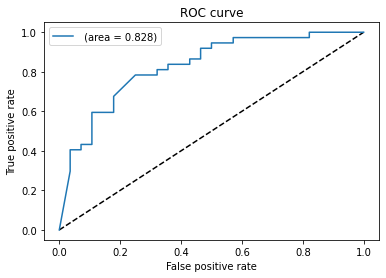

In [16]:
generate_roc_plot(cwe_469_model, X_cwe_469_test, y_cwe_469_test)

In [ ]:
#cwe_469_model.save('/scratch365/palarcon/Vulnerability Project/CNN/cwe_469_model.ph')

INFO:tensorflow:Assets written to: /scratch365/palarcon/Vulnerability Project/CNN/cwe_469_model.ph/assets


# CWE 476

In [17]:
X_cwe_476_train, X_cwe_476_test, y_cwe_476_train, y_cwe_476_test = load_data(folder_path + 'cwe_476_train.csv', 'CWE-476', 40)
cwe_476_model = cnn_model(1533)
cwe_476_model = keras.models.load_model('/content/drive/MyDrive/Vulnerability Prediction/CNN/cwe_476_model.ph')

Label Distribution: 
1    1174
0    1174
Name: CWE-476, dtype: int64
Dataset: 

Shape of features: (2348, 1533, 1) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (2348,) (# samples, ) of type <class 'numpy.ndarray'>
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 1525, 32)          320       
                                                                 
 flatten_3 (Flatten)         (None, 48800)             0         
                                                                 
 dense_6 (Dense)             (None, 200)               9760200   
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 9,760,721
Trainable params: 9,760,721
Non-trainable p

In [ ]:
# fit network
history = cwe_476_model.fit(X_cwe_476_train, y_cwe_476_train, epochs=10, verbose=2)

Epoch 1/10
67/67 - 1s - loss: 23.0685 - accuracy: 0.6285 - 591ms/epoch - 9ms/step
Epoch 2/10
67/67 - 0s - loss: 0.8427 - accuracy: 0.6981 - 305ms/epoch - 5ms/step
Epoch 3/10
67/67 - 0s - loss: 0.6337 - accuracy: 0.7804 - 300ms/epoch - 4ms/step
Epoch 4/10
67/67 - 0s - loss: 0.3765 - accuracy: 0.8486 - 300ms/epoch - 4ms/step
Epoch 5/10
67/67 - 0s - loss: 0.2558 - accuracy: 0.8907 - 292ms/epoch - 4ms/step
Epoch 6/10
67/67 - 0s - loss: 0.2974 - accuracy: 0.8864 - 296ms/epoch - 4ms/step
Epoch 7/10
67/67 - 0s - loss: 0.1887 - accuracy: 0.9342 - 291ms/epoch - 4ms/step
Epoch 8/10
67/67 - 0s - loss: 0.2070 - accuracy: 0.9380 - 300ms/epoch - 4ms/step
Epoch 9/10
67/67 - 0s - loss: 0.2578 - accuracy: 0.9082 - 295ms/epoch - 4ms/step
Epoch 10/10
67/67 - 0s - loss: 0.1639 - accuracy: 0.9361 - 299ms/epoch - 4ms/step


Generate a prediction
prediction shape: (235,)


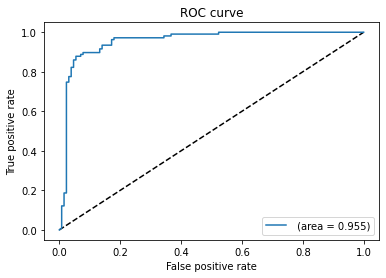

In [18]:
generate_roc_plot(cwe_476_model, X_cwe_476_test, y_cwe_476_test)

In [ ]:
#cwe_476_model.save('/scratch365/palarcon/Vulnerability Project/CNN/cwe_476_model.ph')

INFO:tensorflow:Assets written to: /scratch365/palarcon/Vulnerability Project/CNN/cwe_476_model.ph/assets


# CWE Other

In [19]:
X_cwe_other_train, X_cwe_other_test, y_cwe_other_train, y_cwe_other_test = load_data(folder_path + 'cwe_other_train.csv', 'CWE-other', 40)
cwe_other_model = cnn_model(1533)
cwe_other_model = keras.models.load_model('/content/drive/MyDrive/Vulnerability Prediction/CNN/cwe_other_model.ph')

Label Distribution: 
1    3314
0    3314
Name: CWE-other, dtype: int64
Dataset: 

Shape of features: (6628, 1533, 1) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (6628,) (# samples, ) of type <class 'numpy.ndarray'>
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 1525, 32)          320       
                                                                 
 flatten_4 (Flatten)         (None, 48800)             0         
                                                                 
 dense_8 (Dense)             (None, 200)               9760200   
                                                                 
 dense_9 (Dense)             (None, 1)                 201       
                                                                 
Total params: 9,760,721
Trainable params: 9,760,721
Non-trainable

In [ ]:
# fit network
#history = cwe_other_model.fit(X_cwe_other_train, y_cwe_other_train, epochs=10, verbose=2)

Epoch 1/10
187/187 - 1s - loss: 18.8373 - accuracy: 0.5145 - 1s/epoch - 6ms/step
Epoch 2/10
187/187 - 1s - loss: 0.8315 - accuracy: 0.5215 - 825ms/epoch - 4ms/step
Epoch 3/10
187/187 - 1s - loss: 0.7438 - accuracy: 0.6535 - 824ms/epoch - 4ms/step
Epoch 4/10
187/187 - 1s - loss: 0.5485 - accuracy: 0.7742 - 825ms/epoch - 4ms/step
Epoch 5/10
187/187 - 1s - loss: 0.4693 - accuracy: 0.8381 - 810ms/epoch - 4ms/step
Epoch 6/10
187/187 - 1s - loss: 0.3479 - accuracy: 0.8674 - 811ms/epoch - 4ms/step
Epoch 7/10
187/187 - 1s - loss: 0.2820 - accuracy: 0.8946 - 815ms/epoch - 4ms/step
Epoch 8/10
187/187 - 1s - loss: 0.2775 - accuracy: 0.9018 - 806ms/epoch - 4ms/step
Epoch 9/10
187/187 - 1s - loss: 0.2543 - accuracy: 0.9061 - 796ms/epoch - 4ms/step
Epoch 10/10
187/187 - 1s - loss: 0.2749 - accuracy: 0.9058 - 807ms/epoch - 4ms/step


Generate a prediction
prediction shape: (663,)


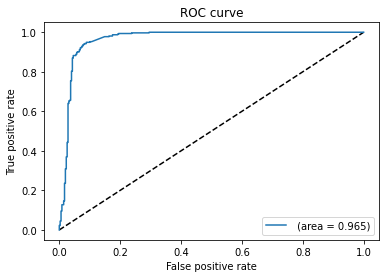

In [20]:
generate_roc_plot(cwe_other_model, X_cwe_other_test, y_cwe_other_test)

In [ ]:
#cwe_other_model.save('/scratch365/palarcon/Vulnerability Project/CNN/cwe_other_model.ph')

INFO:tensorflow:Assets written to: /scratch365/palarcon/Vulnerability Project/CNN/cwe_other_model.ph/assets


# Validation Inference

In [21]:
def generate_roc_plots(models, x_test, y_test, names):
  # Generate a prediction using model.predict() 
  # and calculate it's shape:
    
    fpr, tpr, aucs = [], [], []
    
    #Generate a prediction
    for i in range(len(models)):
        model = models[i]
        pred = model.predict(x_test[i]).ravel()
        
        fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test[i], pred)
        auc_keras = auc(fpr_keras, tpr_keras)
        
        fpr.append(fpr_keras)
        tpr.append(tpr_keras)
        aucs.append(auc_keras)

    
    #generate plot
    plt.figure(figsize=(9,9))
    plt.plot([0, 1], [0, 1], 'k--')
    for i in range(len(models)):
        plt.plot(fpr[i], tpr[i], label=' {} (area = {:.3f})'.format(names[i],aucs[i]))
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

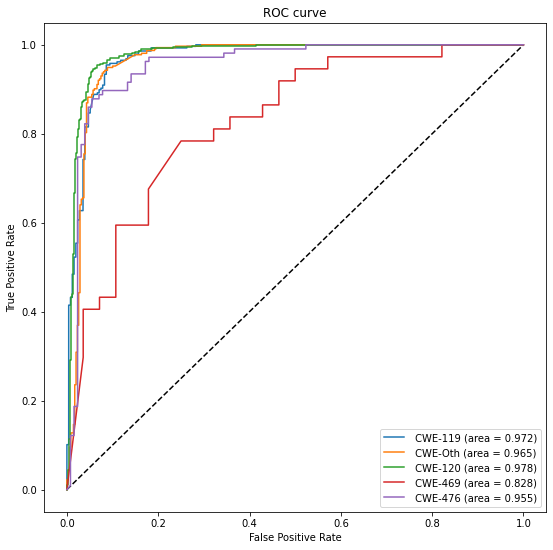

In [24]:
mod = [cwe_119_model, cwe_other_model, cwe_120_model, cwe_469_model, cwe_476_model]
x_tests = [X_cwe_119_test, X_cwe_other_test, X_cwe_120_test, X_cwe_469_test, X_cwe_476_test]
y_tests = [y_cwe_119_test, y_cwe_other_test, y_cwe_120_test, y_cwe_469_test, y_cwe_476_test]
names = ['CWE-119', 'CWE-Oth', 'CWE-120', 'CWE-469','CWE-476']
generate_roc_plots(mod, x_tests, y_tests, names)

In [25]:
def classificationReport(model, X, y):
    # make a prediction on the test set
    yhat = model.predict(X)
    # round probabilities to class labels
    yhat = yhat.round()
    
    print(classification_report(y, yhat))

In [26]:
for i in range(len(mod)):
    print(names[i])
    classificationReport(mod[i], x_tests[i], y_tests[i])

CWE-119
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       255
           1       0.93      0.91      0.92       287

    accuracy                           0.91       542
   macro avg       0.91      0.91      0.91       542
weighted avg       0.91      0.91      0.91       542

CWE-Oth
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       349
           1       0.90      0.95      0.92       314

    accuracy                           0.93       663
   macro avg       0.93      0.93      0.93       663
weighted avg       0.93      0.93      0.93       663

CWE-120
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       500
           1       0.89      0.98      0.93       532

    accuracy                           0.93      1032
   macro avg       0.93      0.93      0.93      1032
weighted avg       0.93      0.93      0.93      1